# Poisson Processes


## Overview

[add intro]

We will use the following imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit


## Memoryless Distributions

Start with the geometric distribution.

Memoryless property is intuitive.

Connect with exponential distribution.

If $Y$ is exponential with rate $\lambda$, then 

$$
    \mathbb P\{Y > y\} = e^{-\lambda y}
    \quad \text{  for all } 
    y \geq 0
$$

Show that exponential is the only memoryless distribution on $\mathbb R_+$.



## Poisson Dynamics

[roadmap]

### Construction

Let $\lambda > 0$ be given and let $\{W_i\}$ be IID exponential with rate $\lambda$.

Let

$$
    J_k := W_1 + \cdots W_k 
    \quad \text{with} \quad
    J_0 = 0
$$

For example, imagine a queue of infinite length, with customer 1 at the front,
customer 2 next, etc.

Let $W_i$ is the amount of time that customer $i$ waits in the
queue. 

Then $J_k$ is the time that the $k$-th customer is served, while

$$
    N_t := \sum_{k \geq 0} k \mathbb 1\{ J_k \leq t < J_{k+1} \}
$$

is the number of customers served by time $t$.

The next figure illustrate the definition of $N_t$ for a given jump sequence $\{J_k\}$.

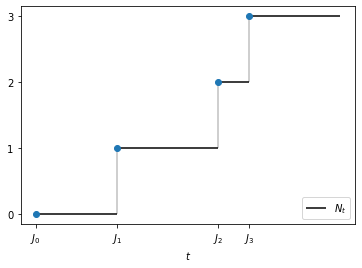

In [2]:
Ks = 0, 1, 2, 3
Js = 0, 0.8, 1.8, 2.1, 3
n = len(Ks)

fig, ax = plt.subplots()

ax.plot(Js[:-1], Ks, 'o')
ax.hlines(Ks, Js[:-1], Js[1:], label='$N_t$')
ax.vlines(Js[:-1], (0, Ks[0], Ks[1], Ks[2]), Ks, alpha=0.25)

ax.set(xticks=Js[:-1],
       xticklabels=[f'$J_{k}$' for k in range(n)],
       yticks=(0, 1, 2, 3),
       xlabel='$t$')

ax.legend(loc='lower right')
plt.show()

An alternative but equivalent definition is

$$
    N_t = \max \{k \geq 0 \,|\, J_k \leq t \}
$$

As a function of $t$, the process $N_t$ is called a **counting process**.



### Properties

**Proposition**  For each $t > 0$, the random variable $N_t$ has the Poisson
distribution with parameter $t \lambda$, so that

$$ 
    \mathbb P\{N_t =k\} 
    = e^{-t \lambda} \frac{(t \lambda)^k }{k!}
    \qquad (k = 0, 1, \ldots)
$$

[stationary, independent increments]

[For a proof, see Norris Thm. 2.4.3.]

An exercise at the end of the lecture asks you to test the claim that $N(t)$ is Poisson-$(t \lambda )$ (informally) via simulation.



## Uniqueness

What other processes have properties xyz listed above?

The answer is none: any process with these properties is necessarily a Poisson
process.

[Give more discussion, add ref.]




## Exercises

Exercise 1
----------

Fix $\lambda > 0$ and draw $\{W_i\}$ as IID exponentials with rate $\lambda$

Set $J_n := W_1 + \cdots W_n$ with $J_0 = 0$ and
    $N_t := \sum_{n \geq 0} n \mathbb 1\{ J_n \leq t < J_{n+1} \}$

Provide a visual test of the claim that $N_t$ is Poisson with parameter $t
\lambda$.

Do this by fixing $t = T$, generating many independent draws of $N_T$ and
comparing the empirical distribution of the sample with a Poisson
distribution with rate $T \lambda$.

Try first with $\lambda = 0.5$ and $T=10$.




## Solutions

Exercise 1
----------

Here is one solution.  

The figure shows that the fit is already good with a modest sample size.

Increasing the sample size will further improve the fit.

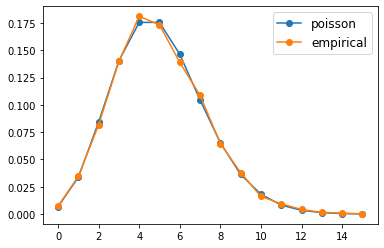

In [3]:
λ = 0.5
T = 10

def poisson(k):
    "Poisson pmf with rate Tλ."
    r = T * λ
    return np.exp(-r) * (r**k) / sp.special.factorial(k)

@njit
def draw_Nt(max_iter=1e5):
    J = 0
    n = 0
    while n < max_iter:
        W = np.random.exponential(scale=1/λ)
        J += W
        if J > T:
            return n
        n += 1

@njit
def draw_Nt_sample(num_draws):
    draws = np.empty(num_draws)
    for i in range(num_draws):
        draws[i] = draw_Nt()
    return draws


sample_size = 10_000
sample = draw_Nt_sample(sample_size)
max_val = sample.max()
vals = np.arange(0, max_val+1)

fig, ax = plt.subplots()

ax.plot(vals, [poisson(v) for v in vals], 
    marker='o', label='poisson')
ax.plot(vals, [np.mean(sample==v) for v in vals], 
    marker='o', label='empirical')

ax.legend(fontsize=12)
plt.show()

